# Pymaceuticals Inc.
---

### Analysis

 1. Most interestingly, it appears the weight of the mouse impacts the efficacy of the drug treatment as with larger weights tumor volume increases on the final day of treatment
 2. Even more itnerestingly (and I added the plot for this), there is no relationship between weight and tumor size on day 1. Meaning weight likely does not influence tuimor development but does influence treatment efficacy
 3. Wiuthout a proper statistical test it ius hard to say that the treatments induced a staistically significant impact on tumor growth, however, it does seem like Capomulin and Ramicane have the largest effect on tumor growth.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [7]:
data=pd.merge(study_results,mouse_metadata, on="Mouse ID" )
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice.
num_mice=len(data['Mouse ID'].unique())
num_mice

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=data.groupby(['Mouse ID', 'Timepoint']).size()
duplicates = duplicates[duplicates > 1]
duplicate_mice = duplicates.index.get_level_values('Mouse ID').unique()
duplicate_mice


Index(['g989'], dtype='object', name='Mouse ID')

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
data[data['Mouse ID']==duplicate_mice[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexes_to_drop=data[data['Mouse ID']==duplicate_mice[0]].index
clean_data=data.drop(index=indexes_to_drop)

In [29]:
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [30]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
columns=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
result=data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'sem', 'var'])
result.columns=columns
result
         


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.322552,50.854632,6.507770,0.512884,42.351070
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
columns=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
result=data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'sem', 'var'])
result.columns=columns
result

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [54]:
counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<Axes: xlabel='Drug Regimen'>

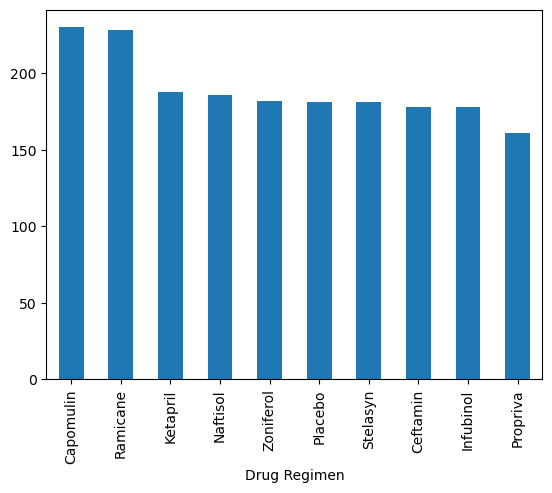

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts=data.groupby(['Drug Regimen'])['Timepoint'].count()
counts=counts.sort_values(ascending=False)
# create a bar plot using pandas
counts.plot(kind='bar')

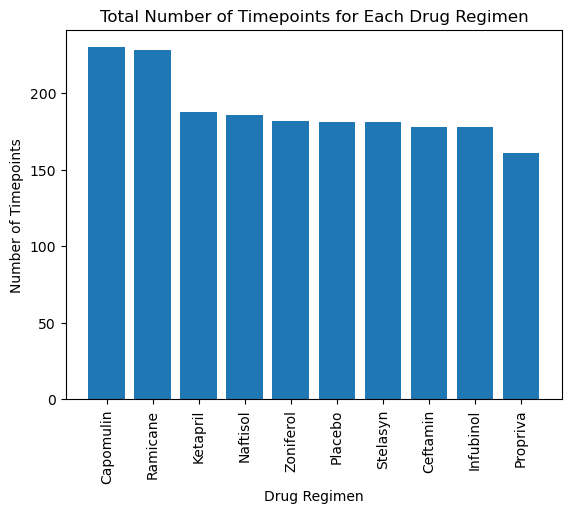

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x=counts.index, height=counts.values)
# set the axis labels and title
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')

# show the plot
plt.show()

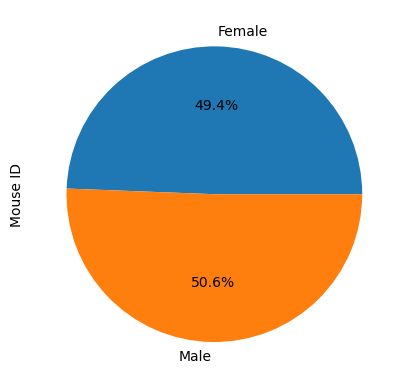

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts=data.groupby('Sex')['Mouse ID'].count()
sex_percentages = sex_counts / sex_counts.sum() * 100
sex_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [81]:
sex_percentages

Sex
Female    49.392499
Male      50.607501
Name: Mouse ID, dtype: float64

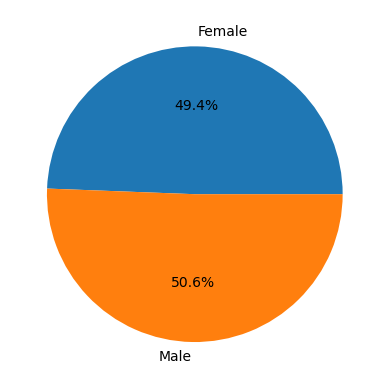

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts=data.groupby('Sex')['Mouse ID'].count()
sex_percentages = sex_counts / sex_counts.sum() * 100

plt.pie(x=sex_percentages, labels=sex_percentages.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last=data['Timepoint'].max()
final=data[data['Timepoint']==last]
mask=(final['Drug Regimen']=='Capomulin') | (final['Drug Regimen']=='Ramicane')|(final['Drug Regimen']=='Infubinol')|(final['Drug Regimen']=='Ceftamin')
final[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
224,c139,45,72.226731,2,Infubinol,Male,11,28
243,y163,45,67.685569,3,Infubinol,Female,17,27
253,k483,45,66.196912,3,Infubinol,Female,20,30
279,z581,45,62.754451,3,Infubinol,Female,24,25
...,...,...,...,...,...,...,...,...
1844,l897,45,38.846876,1,Capomulin,Male,17,19
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19


In [110]:
final[final['Drug Regimen']=='Infubinol']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
224,c139,45,72.226731,2,Infubinol,Male,11,28
243,y163,45,67.685569,3,Infubinol,Female,17,27
253,k483,45,66.196912,3,Infubinol,Female,20,30
279,z581,45,62.754451,3,Infubinol,Female,24,25
289,a251,45,65.525743,1,Infubinol,Female,21,25
907,a203,45,67.973419,2,Infubinol,Female,20,23
1423,a685,45,66.083066,3,Infubinol,Male,8,30
1459,e476,45,62.435404,1,Infubinol,Male,23,26
1659,f345,45,60.918767,1,Infubinol,Male,23,26


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final.loc[final['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add subset 
    tumor_vol.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    summary = tumor_volume.describe()
    lowerq = summary['25%']
    upperq = summary['75%']
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    
    # Print the results
    print(f"{drug} potential outliers: {tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [111]:
tumor_vol

[9       38.982878
 1690    32.377357
 1700    23.343598
 1710    38.939633
 1720    28.484033
 1730    41.483008
 1740    40.728578
 1754    31.023923
 1764    38.125164
 1774    40.658124
 1784    36.041047
 1794    37.311846
 1804    41.581521
 1814    31.896238
 1824    40.159220
 1834    37.074024
 1844    38.846876
 1857    34.455298
 1867    47.685963
 1877    33.329098
 1892    28.430964
 Name: Tumor Volume (mm3), dtype: float64,
 460     31.560470
 470     38.407618
 480     43.047543
 490     37.311236
 500     36.134852
 514     22.050126
 524     33.397653
 544     37.225650
 554     32.978522
 564     33.562402
 574     29.128472
 584     38.810366
 594     40.667713
 604     30.564625
 616     31.095335
 626     30.276232
 636     40.659006
 646     30.638696
 890     45.220869
 1669    36.374510
 Name: Tumor Volume (mm3), dtype: float64,
 224     72.226731
 243     67.685569
 253     66.196912
 279     62.754451
 289     65.525743
 907     67.973419
 1423    66.083066
 1

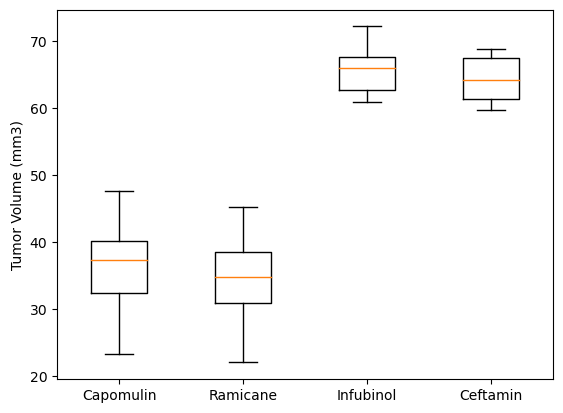

In [119]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol)
plt.xticks(ticks=[1,2,3,4],labels=treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [120]:
cap=data[data['Drug Regimen']=='Capomulin']

In [130]:
mouse=cap[cap['Mouse ID']=='l509']

In [131]:
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0.5, 1.0, 'Tumor Size over Course of Treatment for mouse l509')

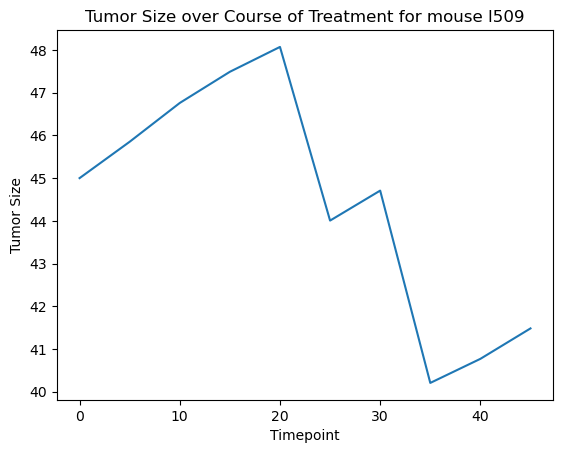

In [133]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Size')
plt.title('Tumor Size over Course of Treatment for mouse l509')

In [134]:
start=

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


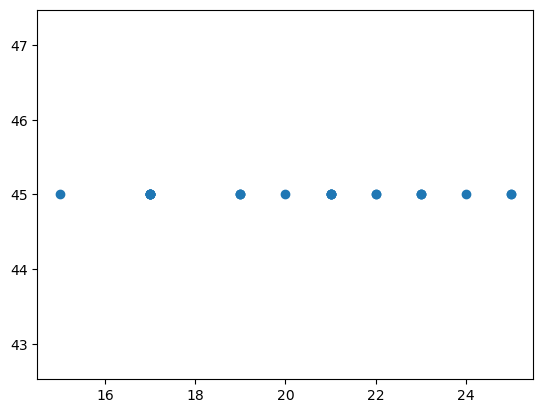

In [151]:
start=cap[cap['Timepoint']==0]
plt.scatter(start['Weight (g)'], start['Tumor Volume (mm3)'])

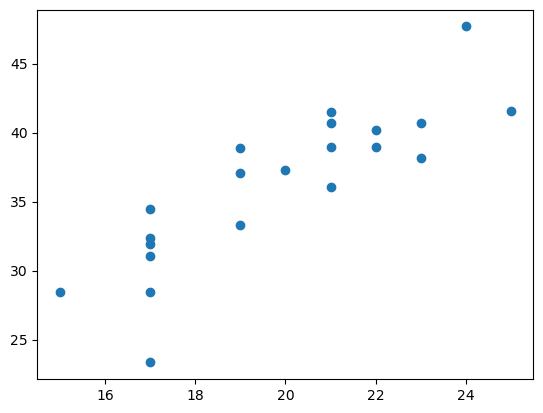

In [145]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

df=cap[cap['Timepoint']==45]
plt.scatter(df['Weight (g)'], df['Tumor Volume (mm3)'])

## Correlation and Regression

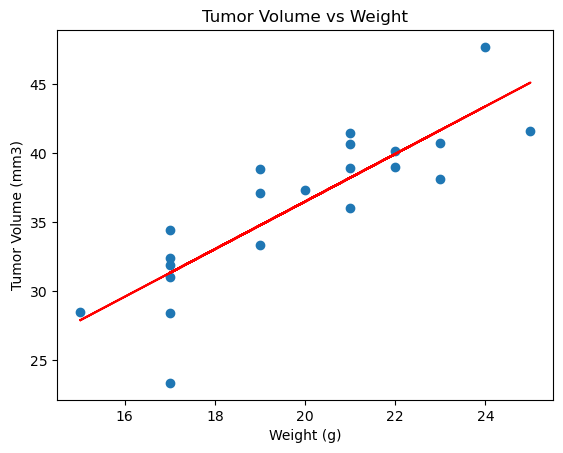

In [150]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


line=st.linregress(x=df['Weight (g)'], y=df['Tumor Volume (mm3)'])
plt.scatter(df['Weight (g)'], df['Tumor Volume (mm3)'])
plt.plot(df['Weight (g)'], line.intercept + line.slope * df['Weight (g)'], color='red')
plt.title('Tumor Volume vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()